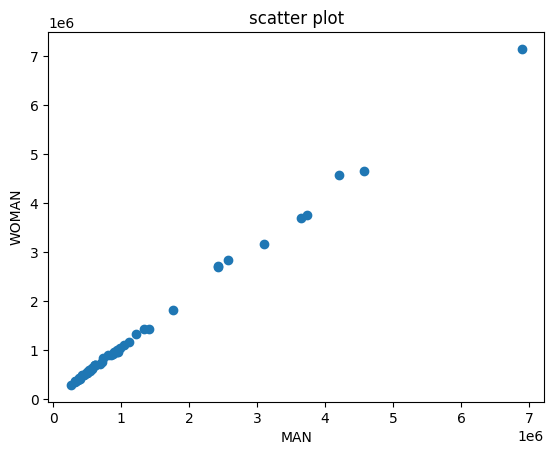

In [1]:
import requests
import xmltodict
import json
import PySimpleGUI as sg
import matplotlib.pyplot as plt

def read_population():
    appId="69ea111ae1ce914c5549e74c8c873b711d5e4efe"
    url="https://api.e-stat.go.jp/rest/3.0/app/getStatsData?cdCat01=A1101%2CA110101%2CA110102&" \
        +"appId="+str(appId)+"&lang=J&statsDataId=0000010101&metaGetFlg=Y&cntGetFlg=N&" \
        +"explanationGetFlg=Y&annotationGetFlg=Y&sectionHeaderFlg=1&replaceSpChars=0"

    x=requests.get(url)
    dict=xmltodict.parse(x.content) #type変更

    js=json.dumps(dict,indent=4,ensure_ascii=False) #Unicodeエスケープされた文字列を通常の文字列に変換(ensure_ascii=False)
    json_load = eval(js)

    json_val1  = json_load['GET_STATS_DATA']['STATISTICAL_DATA']['CLASS_INF']['CLASS_OBJ'][2]['CLASS']
    #dict_val=dict(json_val) #エラーが発生し実施不可:'dict' object is not callable

    dict_name={}
    for v in json_val1:
        code=v['@code']
        dict_name[code]=v['@name']
    #print(dict_name)

    json_val2  = json_load['GET_STATS_DATA']['STATISTICAL_DATA']['DATA_INF']['VALUE']
    check1='A1101'
    check2='A110101'
    check3='A110102'
    fdate='2022100000'
    dict_data_00={}
    dict_data_01={}
    dict_data_02={}
    for v in json_val2:
        if v['@time']==fdate:
            if v['@cat01']==check1:
                    dict_data_00[v['@area']]=v['#text']
            if v['@cat01']==check2:
                    dict_data_01[v['@area']]=v['#text']
            if v['@cat01']==check3:
                    dict_data_02[v['@area']]=v['#text']
    #print(dict_data)

    #for v in dict_data:
    #    print(f"{dict_name[v]}:{dict_data[v]}")

    result=[]
    for row in dict_data_00:
        name=dict_name[row]
        data1=dict_data_00[row]
        data2=dict_data_01[row]
        data3=dict_data_02[row]
        result.append([name,data1,data2,data3])
    return result

def show_table(data):
    layout=[
        [sg.Table(values=data,
                  headings=["都道府県","総人口（万人）","男性人口","女性人口"],
                  auto_size_columns=True,
                  expand_x=True,expand_y=True,
                  justification="right",
                  font=("Arial",14))],
        [sg.Button("閉じる")]]

    window=sg.Window("人口統計",layout,size=(600,400))
    while True:
        event,_=window.read()
        if event in ["閉じる",sg.WIN_CLOSED]:
            break
        window.close()

def show_scatterplot(data):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    #for i in data:
    x=[int(r[2]) for r in data[1:]]
    y=[int(r[3]) for r in data[1:]]
    
    ax.scatter(x,y)
    ax.set_title('scatter plot')
    ax.set_xlabel('MAN')
    ax.set_ylabel('WOMAN')

if __name__ == "__main__":
    data=read_population()
    #print([r[1] for r in data])
    
    #show_table(data)
    show_scatterplot(data)
    